# Ejercicio 2: Python y NLTK. POS tagging

<!-- #1. Procesamiento del corpus cess_esp anotado con información morfosintáctica.
• Descargar corpus usando NLTK.
• Procesar el corpus para transformar la anotación de las etiquetas originales
(289 etiquetas) a un conjunto reducido (66 etiquetas). Para realizar esta
transformación utilizar los siguientes criterios: todas las etiquetas serán de
longitud igual a 2 por defecto, salvo los verbos (v) y los signos de puntuación
(F) que pueden ser de tres. También pueden existir etiquetas de longitud =1.
En el conjunto transformado también se deben eliminar anotaciones de la
forma: (u'*0*', u'sn').
• Nota: para entender el significado de las etiquetas se puede consultar el
siguiente enlace:
https://freeling-user-manual.readthedocs.io/en/latest/tagsets/
• Dividir el corpus en dos partes: training (el 90% de las primeras frases) y de
test (el 10% restante) -->

## 1. Procesamiento del corpus cess_esp anotado con información morfosintáctica.
- Descargar corpus usando NLTK.
- Procesar el corpus para transformar la anotación de las etiquetas originales
(289 etiquetas) a un conjunto reducido (66 etiquetas). Para realizar esta
transformación utilizar los siguientes criterios: todas las etiquetas serán de
longitud igual a 2 por defecto, salvo los verbos (v) y los signos de puntuación
(F) que pueden ser de tres. También pueden existir etiquetas de longitud =1.
En el conjunto transformado también se deben eliminar anotaciones de la
forma: (u'*0*', u'sn').
- Nota: para entender el significado de las etiquetas se puede consultar el
siguiente enlace:
https://freeling-user-manual.readthedocs.io/en/latest/tagsets/
- Dividir el corpus en dos partes: training (el 90% de las primeras frases) y de
test (el 10% restante)

In [36]:
import nltk
from nltk.corpus import cess_esp

In [37]:
# Only run first time to download the corpus
# nltk.download('cess_esp')

In [38]:
corpus = cess_esp.tagged_sents()
print(len(corpus))
print(corpus[0])

6030
[('El', 'da0ms0'), ('grupo', 'ncms000'), ('estatal', 'aq0cs0'), ('Electricité_de_France', 'np00000'), ('-Fpa-', 'Fpa'), ('EDF', 'np00000'), ('-Fpt-', 'Fpt'), ('anunció', 'vmis3s0'), ('hoy', 'rg'), (',', 'Fc'), ('jueves', 'W'), (',', 'Fc'), ('la', 'da0fs0'), ('compra', 'ncfs000'), ('del', 'spcms'), ('51_por_ciento', 'Zp'), ('de', 'sps00'), ('la', 'da0fs0'), ('empresa', 'ncfs000'), ('mexicana', 'aq0fs0'), ('Electricidad_Águila_de_Altamira', 'np00000'), ('-Fpa-', 'Fpa'), ('EAA', 'np00000'), ('-Fpt-', 'Fpt'), (',', 'Fc'), ('creada', 'aq0fsp'), ('por', 'sps00'), ('el', 'da0ms0'), ('japonés', 'aq0ms0'), ('Mitsubishi_Corporation', 'np00000'), ('para', 'sps00'), ('poner_en_marcha', 'vmn0000'), ('una', 'di0fs0'), ('central', 'ncfs000'), ('de', 'sps00'), ('gas', 'ncms000'), ('de', 'sps00'), ('495', 'Z'), ('megavatios', 'ncmp000'), ('.', 'Fp')]


In [39]:
processed_corpus = []
for sentence in corpus:
    reduced_s = []
    for word, category in sentence:
        if word != "*0*" and category[0:2] != "sn":
            if category[0] == "v" or category[0] == "F":
                reduced_s.append((word, category[0:3]))
            else:
                reduced_s.append((word, category[0:2]))
    processed_corpus.append(reduced_s)
processed_corpus

[[('El', 'da'),
  ('grupo', 'nc'),
  ('estatal', 'aq'),
  ('Electricité_de_France', 'np'),
  ('-Fpa-', 'Fpa'),
  ('EDF', 'np'),
  ('-Fpt-', 'Fpt'),
  ('anunció', 'vmi'),
  ('hoy', 'rg'),
  (',', 'Fc'),
  ('jueves', 'W'),
  (',', 'Fc'),
  ('la', 'da'),
  ('compra', 'nc'),
  ('del', 'sp'),
  ('51_por_ciento', 'Zp'),
  ('de', 'sp'),
  ('la', 'da'),
  ('empresa', 'nc'),
  ('mexicana', 'aq'),
  ('Electricidad_Águila_de_Altamira', 'np'),
  ('-Fpa-', 'Fpa'),
  ('EAA', 'np'),
  ('-Fpt-', 'Fpt'),
  (',', 'Fc'),
  ('creada', 'aq'),
  ('por', 'sp'),
  ('el', 'da'),
  ('japonés', 'aq'),
  ('Mitsubishi_Corporation', 'np'),
  ('para', 'sp'),
  ('poner_en_marcha', 'vmn'),
  ('una', 'di'),
  ('central', 'nc'),
  ('de', 'sp'),
  ('gas', 'nc'),
  ('de', 'sp'),
  ('495', 'Z'),
  ('megavatios', 'nc'),
  ('.', 'Fp')],
 [('Una', 'di'),
  ('portavoz', 'nc'),
  ('de', 'sp'),
  ('EDF', 'np'),
  ('explicó', 'vmi'),
  ('a', 'sp'),
  ('EFE', 'np'),
  ('que', 'cs'),
  ('el', 'da'),
  ('proyecto', 'nc'),
  ('para',

In [40]:
# Split the corpus into training 90% and test 10%
training = processed_corpus[0 : int(len(processed_corpus) * 0.9)]
test = processed_corpus[int(len(processed_corpus) * 0.9) :]
print(f"Longitud muestra training: {len(training)}")
print(f"Longitud muestra test: {len(test)}")

Longitud muestra training: 5427
Longitud muestra test: 603


In [41]:
# Unpack the corpus into words and tags and check number of different tags
training_tags = [tag for sentence in processed_corpus for word, tag in sentence]

print(f"Despues del procesado hay {len(set(training_tags))} tags diferentes")

Despues del procesado hay 66 tags diferentes


## 2. Entrenar HMM y TNT
Uso de etiquetadores morfosintácticos (usar los modelos [hmm](https://www.nltk.org/api/nltk.tag.hmm.html) y [tnt](https://www.nltk.org/api/nltk.tag.tnt.html)).
- Saber entrenar el etiquetador con la partición de entrenamiento previamente
transformada
- Saber etiquetar un conjunto de test con el modelo aprendido
- Evaluar las prestaciones de un etiquetador

### 2.1 Train models

In [42]:
from nltk.tag import hmm
from nltk.tag import tnt

In [43]:
hmm_model = hmm.HiddenMarkovModelTagger.train(training)
tnt_model = tnt.TnT()
tnt_model.train(training)

### 2.2 Test labels

In [44]:
# Etiqutetas de las palabras de test en función de los modelos
hmmtags = hmm_model.tag([word for word, tag in test[0]])
tnttags = tnt_model.tag([word for word, tag in test[0]])
print(f"Hmm tagging test[0]: {hmmtags}")
print(f"Tnt tagging test[0]: {tnttags}")

Hmm tagging test[0]: [('Y', 'cc'), ('al_final', 'rg'), ('le', 'pp'), ('pedía', 'vmi'), ('que', 'cs'), ('colabore', 'vai'), ('conmigo', 'vmp'), ('en', 'sp'), ('la', 'da'), ('campaña', 'nc'), ('electoral', 'aq'), ('vasca', 'aq'), ('-', 'Fg'), ('.', 'Fp')]
Tnt tagging test[0]: [('Y', 'cc'), ('al_final', 'rg'), ('le', 'pp'), ('pedía', 'vmi'), ('que', 'cs'), ('colabore', 'Unk'), ('conmigo', 'Unk'), ('en', 'sp'), ('la', 'da'), ('campaña', 'nc'), ('electoral', 'aq'), ('vasca', 'aq'), ('-', 'Fg'), ('.', 'Fp')]


### 2.3 Evaluate models

In [45]:
hmm_ac = hmm_model.accuracy(test)
tnt_ac = tnt_model.accuracy(test)

In [46]:
print(f"HMM accuracy: {hmm_ac}")
print(f"TnT accuracy: {tnt_ac}")

HMM accuracy: 0.8784427571832664
TnT accuracy: 0.8255173440524044


## 3. Corpus evaluación
Hacer una evaluación de las prestaciones de etiquetado usando todo el corpus (10-fold
cross validation). Se propone hacer las 10 particiones usando el corpus reducido en el
orden original y barajándolo (sugerencia: se puede usar el método shuffle
importándolo del módulo random “from random import shuffle”). Comprobar si al
barajar el corpus se observan diferencias en los resultados de cada partición.

### 3.1 Ten fold data split-train

In [47]:
from random import shuffle
import math

In [48]:
def kfold_cond_shuffle(cp, k=10, s=False):
    """Divide the corpus into k folds and shuffle it if s is True"""
    if s:
        print("Shuffling corpus...")
        shuffle(cp)
    return [cp[int(len(cp) * i / k) : int(len(cp) * (i + 1) / k)] for i in range(k)]

In [49]:
def get_k_fold_accuracy_error(cp: list, m: int, k: int = 10, s=False):
    """Grabs the k-fold cross validated accuracy of a model given a folded corpus for HMM or TnT models (0,1)

    Args¨:
        corpus: list of procceced sentences
        m: hmm or tnt model indicator (0,1)
        k: number of folds
        s: shuffle indicator

    Returns:
        accuracy: list of accuracies for each fold
        error_intervals: list of error intervals for each fold
    """

    accuracy = []
    error_intervals = []
    folded_corpus = kfold_cond_shuffle(cp, k, s)
    for i in range(k):
        test = folded_corpus[i]
        training_ll = [fold for j, fold in enumerate(folded_corpus) if j != i]
        training = [sentence for fold in training_ll for sentence in fold]
        if m == 0:
            model = hmm.HiddenMarkovModelTagger.train(training)
        elif m == 1:
            model = tnt.TnT()
            model.train(training)
        else:
            raise ValueError("Model must be 0 or 1", model)
        ac = model.accuracy(test)
        accuracy.append(ac)
        len_test = 0
        for sentence in test:
            len_test += len(sentence)
        error_intervals.append(1.96 * math.sqrt((1 - ac) * ac) / len_test)
    return accuracy, error_intervals

In [50]:
hmm_10_ac, hmm_10_error = get_k_fold_accuracy_error(cp=processed_corpus, m=0)
tnt_10_ac, tnt_10_error = get_k_fold_accuracy_error(cp=processed_corpus, m=1)

In [51]:
tnt_10_ac_s, tnt_10_error_s = get_k_fold_accuracy_error(
    cp=processed_corpus, m=1, s=True
)
hmm_10_ac_s, hmm_10_error_s = get_k_fold_accuracy_error(
    cp=processed_corpus, m=0, s=True
)

Shuffling corpus...
Shuffling corpus...


### 3.2 Grafico de resultados

In [52]:
import matplotlib.pyplot as plt

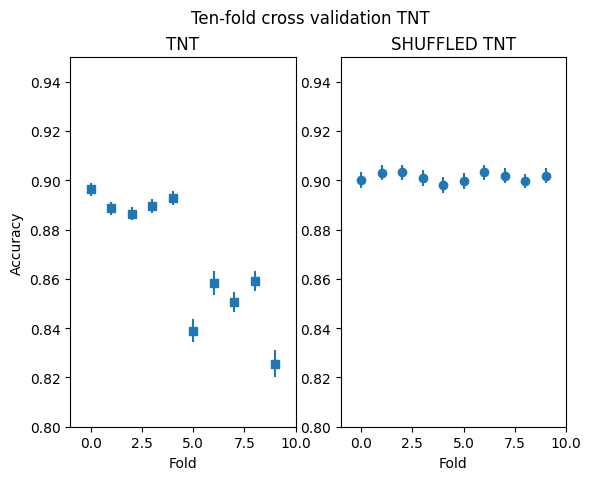

In [53]:
x = range(10)
fig = plt.figure()
fig.suptitle("Ten-fold cross validation TNT")
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Fold")
ax1.set_title("TNT")
plt.axis([-1, 10, 0.8, 0.95])
ax1.scatter(x, tnt_10_ac, s=10, c="b", marker="s", label="TNT")
ax1.errorbar(x, tnt_10_ac, yerr=[e*100 for e in tnt_10_error], fmt="s")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("Fold")
ax2.set_title("SHUFFLED TNT")
plt.axis([-1, 10, 0.8, 0.95])

ax2.scatter(x, tnt_10_ac_s, s=10, c="r", marker="o", label="TNT_S")
ax2.errorbar(x, tnt_10_ac_s, yerr=[e*100 for e in tnt_10_error_s], fmt="o")


plt.show()

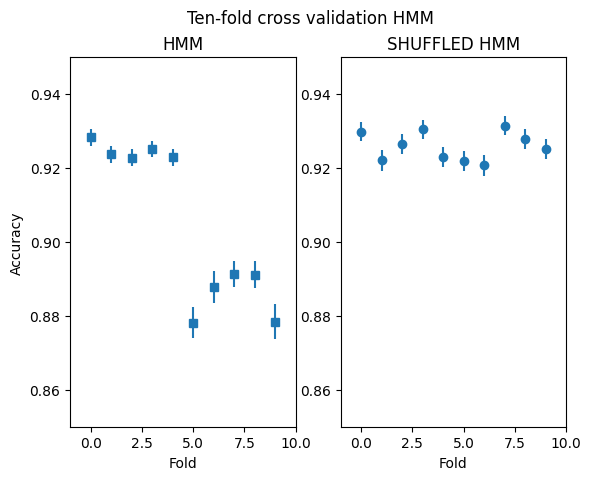

In [54]:
x = range(10)
fig = plt.figure()
fig.suptitle("Ten-fold cross validation HMM")
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Fold")
ax1.set_title("HMM")
plt.axis([-1, 10, 0.85, 0.95])
ax1.scatter(x, hmm_10_ac, s=10, c="b", marker="s", label="TNT")
ax1.errorbar(x, hmm_10_ac, yerr=[e*100 for e in hmm_10_error], fmt="s")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel("Fold")
ax2.set_title("SHUFFLED HMM")
plt.axis([-1, 10, 0.85, 0.95])

ax2.scatter(x, hmm_10_ac_s, s=10, c="r", marker="o", label="TNT_S")
ax2.errorbar(x, hmm_10_ac_s, yerr=[e*100 for e in hmm_10_error_s], fmt="o")


plt.show()